In [36]:
import pandas as pd
import numpy as np


transaction = pd.read_csv('transaction.csv')

transaction['trDte'] = pd.to_datetime(transaction['trDte'], format='mixed')
print(transaction.head(5))

       trDte          bcode     clientID      item  \
0 2017-01-09  code000000001  client13166   sku8444   
1 2017-01-09  code000000001  client13166  sku12545   
2 2017-01-09  code000000001  client13166   sku3391   
3 2017-01-09  code000000001  client13166  sku20444   
4 2017-01-09  code000000002   client1239  sku29959   

                      itemGroup  quantity  amount  
0              Скобяные изделия         1      29  
1  Оборудование для сада и дачи         1     329  
2                   Инструменты         1     169  
3                   Инструменты         2     578  
4              Скобяные изделия         1     329  


In [37]:
print("\nInformation")

print(f"Кол-во строк:{transaction.shape[0]}")
print(f"Кол-во столбцов:{transaction.shape[1]}")
print(f"Типы данных:{transaction.dtypes}")



Information
Кол-во строк:1008688
Кол-во столбцов:7
Типы данных:trDte        datetime64[ns]
bcode                object
clientID             object
item                 object
itemGroup            object
quantity              int64
amount                int64
dtype: object


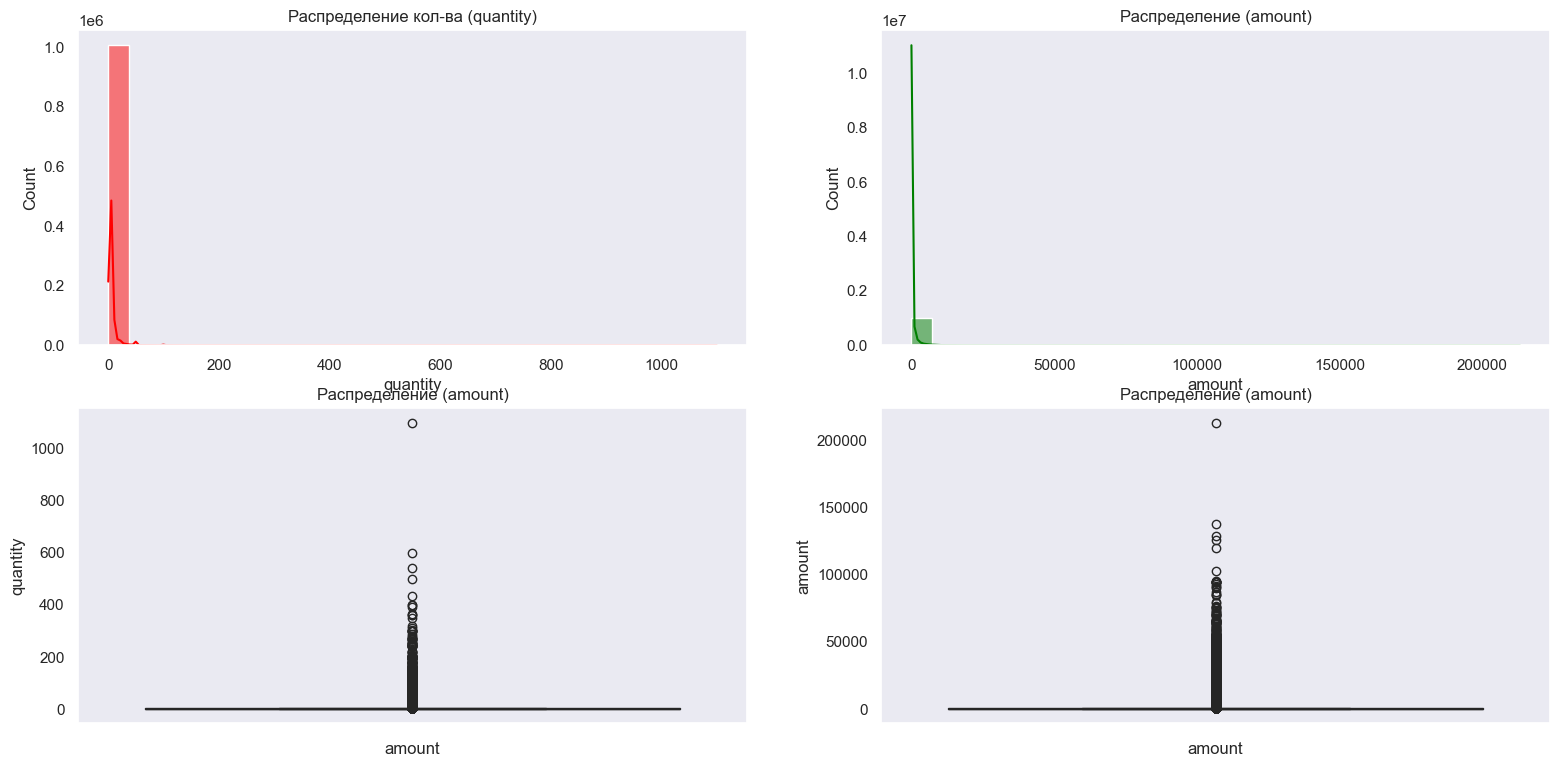

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="dark")

plt.figure(figsize=(19,9))

plt.subplot(2,2,1)
sns.histplot(transaction['quantity'], bins=30, kde=True, color='red')
plt.title("Распределение кол-ва (quantity)")
plt.xlabel("quantity")

plt.subplot(2,2,2)
sns.histplot(transaction['amount'], bins=30, kde=True, color='green')
plt.title("Распределение (amount)")
plt.xlabel("amount")

plt.subplot(2,2,3)
sns.boxplot(transaction['quantity'], color='green')
plt.title("Распределение (amount)")
plt.xlabel("amount")

plt.subplot(2,2,4)
sns.boxplot(transaction['amount'], color='green')
plt.title("Распределение (amount)")
plt.xlabel("amount")


plt.show()

In [39]:
top_5_products = (transaction.groupby('item')
                  .agg({'quantity':'sum','amount':'sum'})
                  .sort_values(by='amount', ascending=False)
                  .head(5))

print(f"Топ 5-продуктов: {top_5_products}")

Топ 5-продуктов:           quantity   amount
item                       
sku26161     18902  5373638
sku18199      7250  3951361
sku21947     15304  3918570
sku28128      7705  3027786
sku8342       3512  2113158


In [40]:
def get_top_parametrs(tr, n):
    top_n = (tr.groupby('item')
                .agg({'quantity':'sum','amount':'sum'})
                .sort_values(by='amount', ascending=False)
                .head(n))
    
    return top_n

print(get_top_parametrs(transaction,10))

          quantity   amount
item                       
sku26161     18902  5373638
sku18199      7250  3951361
sku21947     15304  3918570
sku28128      7705  3027786
sku8342       3512  2113158
sku29626     13669  1973964
sku9018       3299  1706341
sku9471       5045  1675843
sku25074      6125  1668585
sku27791      8384  1645042


In [41]:
'''Слайд 17'''
end_date = '2019-10-31'
period_months = 6

start_date = pd.to_datetime(end_date) - pd.DateOffset(month=period_months)

filtered = transaction[(transaction['trDte'] >= start_date) & (transaction['trDte'] <= pd.to_datetime(end_date))]

print(get_top_parametrs(filtered, 5))

          quantity   amount
item                       
sku26161      4706  1420956
sku18199      1667  1037643
sku21947      3537   941263
sku27791      2860   529284
sku8342        798   519468


In [42]:
'''как дальше сделать статистику  по столбцам: - Для quantity:
min, max, mean, median - Для amount: min, max, mean,
median - Для количества дат визитов: min, max, mean'''

client_stats = (transaction.groupby('clientID')
                .agg({
                    'quantity': 'sum',
                    'amount': 'sum',
                    'trDte': 'nunique'
                })
                .rename(columns={'trDte': 'visit_count'})
                .sort_values(by='amount', ascending=False))

print(client_stats.head(10))
print("\n" + "="*60)
print("Статистика по всем клиентам:")
print("="*60)

print("\nДля quantity:")
print(f"min: {client_stats['quantity'].min():.2f}")
print(f"max: {client_stats['quantity'].max():.2f}")
print(f"mean: {client_stats['quantity'].mean():.2f}")
print(f"median: {client_stats['quantity'].median():.2f}")

print("\nДля amount:")
print(f"min: {client_stats['amount'].min():.2f}")
print(f"max: {client_stats['amount'].max():.2f}")
print(f"mean: {client_stats['amount'].mean():.2f}")
print(f"median: {client_stats['amount'].median():.2f}")

print("\nДля количества дат визитов:")
print(f"min: {client_stats['visit_count'].min():.2f}")
print(f"max: {client_stats['visit_count'].max():.2f}")
print(f"mean: {client_stats['visit_count'].mean():.2f}")

             quantity   amount  visit_count
clientID                                   
client29182      3434  3887309          107
client15654      5457  1443255          174
client8778       1617   986618           17
client1704       1187   636101           23
client33032      1255   537397           74
client37582      2526   502515          159
client20512      1271   431752           70
client6049       1963   431041           87
client30096      1079   429072          119
client30977      2234   407138          121

Статистика по всем клиентам:

Для quantity:
min: 1.00
max: 5457.00
mean: 52.44
median: 21.00

Для amount:
min: 10.00
max: 3887309.00
mean: 14705.66
median: 6410.00

Для количества дат визитов:
min: 1.00
max: 174.00
mean: 6.18


как дальше сделать статистику  по столбцам: - Для quantity:
min, max, mean, median - Для amount: min, max, mean,
median - Для количества дат визитов: min, max, mean
 client_stats = (transaction.groupby('clientID')
                .agg({
                    'quantity': 'sum',
                    'amount': 'sum',
                    'trDte': 'nunique'
                })
                .rename(columns={'trDte': 'visit_count'})
                .sort_values(by='amount', ascending=False))

In [62]:
extremt_client = client_stats.loc[
    (client_stats['amount'] > 500000) | (client_stats['quantity'] > 2000)
] 

print(f'extremt_client: {len(extremt_client)}\n')

print(extremt_client)
# for i, row in extremt_client.iterrows():
#     reason = []
#     if row['amount']>500000:
#         reason.append(f"amount = {row['amount']}")
#     if row['quantity'] > 2000:
#         reason.append(f"quantity={row['quantity']}")

#     print(f"{i}: {','.join(reason)}")


extremt_client: 9

             quantity   amount  visit_count
clientID                                   
client29182      3434  3887309          107
client15654      5457  1443255          174
client8778       1617   986618           17
client1704       1187   636101           23
client33032      1255   537397           74
client37582      2526   502515          159
client30977      2234   407138          121
client34081      2470   386355          157
client20310      3265   366035          102


На основе датафрейма client_stats:
1. Отфильтруй клиентов, у которых: - Количество товаров >=
2000 ИЛИ - Сумма >= 500000
2. Выведи количество найденных клиентов и их список
3. Покажи эти клиентов с их основными характеристиками
4. Опционально: сохрани их ID для дальнейшего анализа в
список 'extreme_clients'

In [68]:
filter_client_once = client_stats.loc[
    (client_stats['visit_count']==1)
]

print(f'Кол-во клиентов с одним днем визита {len(filter_client_once)}\n')
# print(filter_client_once.head(10))

print(f"mean quantity: {filter_client_once['quantity'].mean():.2f}")
print(f"mean amount: {filter_client_once['amount'].mean():.2f}")

Кол-во клиентов с одним днем визита 12859

mean quantity: 8.67
mean amount: 3535.45


In [70]:
'''24 слайд'''
zero_rows = transaction[transaction['quantity'] == 0]
print(f"Найдено строк с quantity = 0: {len(zero_rows)}")

if not zero_rows.empty:
    print("Строки с quantity=0:")
    print(zero_rows)
    transaction = transaction[transaction['quantity'] != 0].copy()

# 2. Создание столбца price
transaction['price'] = transaction['amount'] / transaction['quantity']

# 3. Статистика по price
print("\nСтатистика price:")
print(f"min:    {transaction['price'].min():.2f}")
print(f"max:    {transaction['price'].max():.2f}")
print(f"mean:   {transaction['price'].mean():.2f}")
print(f"median: {transaction['price'].median():.2f}")

# 4. Первые 10 строк
print("\nПервые 10 строк:")
print(transaction.head(10))

Найдено строк с quantity = 0: 0

Статистика price:
min:    0.00
max:    119500.00
mean:   389.78
median: 102.89

Первые 10 строк:
       trDte          bcode     clientID      item  \
0 2017-01-09  code000000001  client13166   sku8444   
1 2017-01-09  code000000001  client13166  sku12545   
2 2017-01-09  code000000001  client13166   sku3391   
3 2017-01-09  code000000001  client13166  sku20444   
4 2017-01-09  code000000002   client1239  sku29959   
5 2017-01-09  code000000002   client1239  sku19394   
6 2017-01-09  code000000002   client1239   sku9916   
7 2017-01-09  code000000002   client1239  sku27003   
8 2017-01-09  code000000002   client1239  sku15395   
9 2017-01-09  code000000002   client1239  sku25185   

                      itemGroup  quantity  amount  price  
0              Скобяные изделия         1      29   29.0  
1  Оборудование для сада и дачи         1     329  329.0  
2                   Инструменты         1     169  169.0  
3                   Инструменты        

На основе исходного DataFrame:
1. Перед расчетом убедись, что нет строк с quantity = 0 (это может
привести к делению на 0) - Подсчитай количество таких строк - Если
есть, выведи их и удали из DataFrame
2. Создай новый столбец 'price' = amount / quantity
3. Выведи статистику по новому столбцу price: - min, max, mean, median
4. Выведи первые 10 строк исходного DataFrame + новый столбец price

Выбросов: 112596 (11.2%)

10 самых дешевых выбросов:
             price  quantity  amount
393100  614.142857        14    8598
393099  614.166667        12    7370
499700  614.500000        14    8603
560204  614.500000         2    1229
353878  614.666667         3    1844
693758  614.666667         6    3688
643756  614.750000         4    2459
867779  614.800000         5    3074
476533  614.833333         6    3689
885138  614.833333         6    3689

10 самых дорогих выбросов:
           price  quantity  amount
734936  119500.0         1  119500
242769   76990.0         1   76990
153014   74990.0         1   74990
847552   74990.0         1   74990
713368   71991.0         1   71991
704822   71241.0         1   71241
766446   71241.0         1   71241
222969   69990.0         1   69990
624879   69990.0         1   69990
648925   69741.0         1   69741


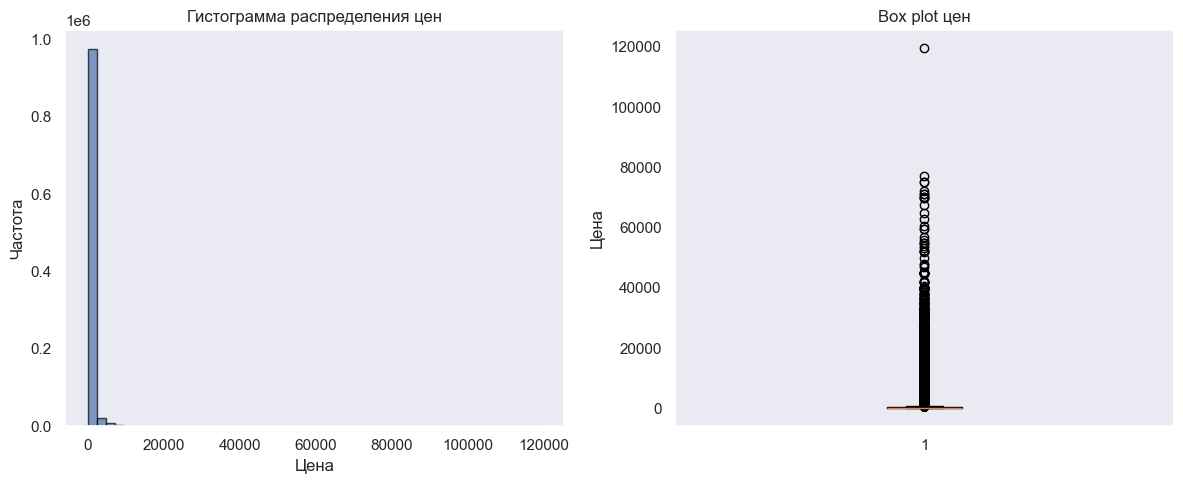

In [71]:
# 1. Описательная статистика
Q1, Q2, Q3 = transaction['price'].quantile([0.25, 0.5, 0.75])
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 2. Количество выбросов
outliers = transaction[(transaction['price'] < lower_bound) | (transaction['price'] > upper_bound)]
print(f"Выбросов: {len(outliers)} ({len(outliers)/len(transaction)*100:.1f}%)")

# 3. Примеры выбросов
if len(outliers) > 0:
    print("\n10 самых дешевых выбросов:")
    print(outliers.nsmallest(10, 'price')[['price', 'quantity', 'amount']])
    
    print("\n10 самых дорогих выбросов:")
    print(outliers.nlargest(10, 'price')[['price', 'quantity', 'amount']])

# 4. Визуализация
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Гистограмма
ax1.hist(transaction['price'], bins=50, edgecolor='black', alpha=0.7)
ax1.set_xlabel('Цена')
ax1.set_ylabel('Частота')
ax1.set_title('Гистограмма распределения цен')

# Box plot
ax2.boxplot(transaction['price'])
ax2.set_ylabel('Цена')
ax2.set_title('Box plot цен')

plt.tight_layout()
plt.show()

Задача: Посмотреть на распределение цен, чтобы понять, есть ли выбросы и как распределены
данные.
Визуализация (гистограмма, диаграмма размаха) помогает выявить проблемы в данных.
Функции: описательная статистика, квартили, межквартильный
размах
На основе DataFrame с рассчитанной ценой товара:
1. Выведи описательную статистику столбца 'price': - Квартили
(25%, 50%, 75%) - Минимум и максимум - Межквартильный
диапазон (IQR = Q3 - Q1)
2. Рассчитай границы для потенциальных выбросов: - lower_bound
= Q1 - 1.5 * IQR - upper_bound = Q3 + 1.5 * IQR
3. Подсчитай количество выбросов (цены за пределами этих
границ)
4. Выведи примеры выбросов (10 самых дорогих и 10 самых дешевых
товаров) и создай визуализацию гистограммы и box plot

In [ ]:
'''29 слайд! МБ ПЕРЕДЕЛАТЬ'''
product_sales = (transaction.groupby('item')['amount']
                 .sum()
                 .reset_index()
                 .sort_values('amount', ascending=False)
                 .reset_index(drop=True))

product_sales['cumulative_sum'] = product_sales['amount'].cumsum()
total_sum = product_sales['amount'].sum()
product_sales['cumulative_percent'] = product_sales['cumulative_sum'] / total_sum * 100

def assign_group(pct):
    if pct <= 80: return 'A'
    elif pct <= 95: return 'B'
    else: return 'C'

product_sales['abc_group'] = product_sales['cumulative_percent'].apply(assign_group)

print("ABC-анализ товаров:")
print("="*50)

for group in ['A', 'B', 'C']:
    group_data = product_sales[product_sales['abc_group'] == group]
    print(f"\nГруппа {group}:")
    print(f"  Количество товаров: {len(group_data)}")
    print(f"  Доля продаж: {group_data['amount'].sum()/total_sum*100:.1f}%")
    
    if len(group_data) > 0:
        print("  Примеры товаров:")
        for item in group_data.head(3)['item']:
            print(f"    • {item}")

ABC-анализ товаров:

Группа A:
  Количество товаров: 5353
  Доля продаж: 80.0%
  Примеры товаров:
    • sku26161
    • sku18199
    • sku21947

Группа B:
  Количество товаров: 8234
  Доля продаж: 15.0%
  Примеры товаров:
    • sku10822
    • sku10724
    • sku29015

Группа C:
  Количество товаров: 16979
  Доля продаж: 5.0%
  Примеры товаров:
    • sku13438
    • sku872
    • sku18189


Задача: Выполнить АВС-анализ товаров по сумме продаж. АВС-анализ делит товары на три группы:
▪ Группа А (80% выручки) - ключевые товары для бизнеса
▪ Группа В (15% выручки) - средней важности
▪ Группа С (5% выручки) - малозначимые
Функции: groupby, сортировка, расчет накопительного процента

Выполни АВС-анализ товаров по сумме продаж:
1. Сгруппируй данные по item и рассчитай сумму продаж каждого
товара
2. Отсортируй товары по сумме продаж в убывающем порядке
3. Рассчитай накопительный процент (cumulative %) для каждого
товара: - Общая сумма всех продаж = total_sum - Для каждого
товара: cumulative_sum / total_sum * 100
4. На основе накопительного процента распредели товары на
группы: - Группа A: cumulative % <= 80% - Группа B:
cumulative % > 80% and <= 95% - Группа C: cumulative % > 95%
5. Выведи количество товаров в каждой группе и примеры товаров
из каждой группы

In [ ]:
# XYZ-анализ (компактная версия)
print("XYZ-АНАЛИЗ ТОВАРОВ")

product_stats = transaction.groupby('item')['quantity'].agg([
    'mean', 'std', 'sum', 'count'
]).reset_index()

product_stats['cv_percent'] = (product_stats['std'] / product_stats['mean'] * 100).fillna(999)

def assign_xyz(cv):
    if cv < 15: return 'X'
    elif cv <= 25: return 'Y'
    else: return 'Z'

product_stats['xyz_group'] = product_stats['cv_percent'].apply(assign_xyz)

print("\nРаспределение по группам:")
summary = product_stats.groupby('xyz_group').agg(
    Количество=('item', 'count'),
    Средний_CV=('cv_percent', 'mean')
).round(1)
print(summary)

print("\nИтоговый датафрейм (первые 10 строк):")
print(product_stats.head(10))

XYZ-АНАЛИЗ ТОВАРОВ

Распределение по группам:
           Количество  Средний_CV
xyz_group                        
X                8028         0.3
Y                1354        20.9
Z               21184       224.3

Итоговый датафрейм (первые 10 строк):
       item      mean       std  sum  count  cv_percent xyz_group
0      sku1  1.375000  0.517549   11      8   37.639940         Z
1     sku10  2.000000  1.224745   10      5   61.237244         Z
2    sku100  1.396552  0.883465  162    116   63.260430         Z
3   sku1000  1.268293  0.667569  104     82   52.635279         Z
4  sku10000  2.483871  2.908275   77     31  117.086403         Z
5  sku10001  2.000000  2.408319   22     11  120.415946         Z
6  sku10002  1.000000  0.000000    6      6    0.000000         X
7  sku10003  1.000000  0.000000   11     11    0.000000         X
8  sku10004  4.333333  6.218253   26      6  143.498139         Z
9  sku10005  1.000000  0.000000    2      2    0.000000         X


Задача: Выполнить XYZ-анализ товаров по стабильности продаж (на основе количества товаров).
XYZ-анализ показывает стабильность спроса:
▪ Группа X (стабильный спрос) - коэффициент вариации < 15%
▪ Группа Y (колеблющийся спрос) - коэффициент вариации 15-25%
▪ Группа Z (нестабильный спрос) - коэффициент вариации > 25%
Функции: groupby, расчет std, коэффициент вариации
Дополни XYZ-анализ товаров (по количеству): Используй
для расчета коэффициент вариации = std / mean * 100. На
основе коэффициента вариации распредели товары: -
Группа X: CV < 15% - Группа Y: 15% <= CV <= 25% -
Группа Z: CV > 25%. Выведи количество товаров в каждой
группе и итоговый датафрейм.

In [ ]:
# 1. ABC анализ
abc = transaction.groupby('item')['amount'].sum().reset_index()
abc = abc.sort_values('amount', ascending=False)
abc['cum_pct'] = abc['amount'].cumsum() / abc['amount'].sum() * 100
abc['abc_group'] = abc['cum_pct'].apply(lambda x: 'A' if x <= 80 else ('B' if x <= 95 else 'C'))

# 2. XYZ анализ
xyz = transaction.groupby('item')['quantity'].agg(['mean', 'std']).reset_index()
xyz['cv'] = (xyz['std'] / xyz['mean'] * 100).fillna(999)
xyz['xyz_group'] = xyz['cv'].apply(lambda x: 'X' if x < 15 else ('Y' if x <= 25 else 'Z'))

matrix = pd.merge(abc[['item', 'abc_group']], xyz[['item', 'xyz_group']], on='item')

cross_tab = pd.crosstab(matrix['abc_group'], matrix['xyz_group'], margins=True)
print("Матрица ABC-XYZ:")
print(cross_tab)

Матрица ABC-XYZ:
xyz_group     X     Y      Z    All
abc_group                          
A          1471   297   3585   5353
B          2050   411   5773   8234
C          4507   646  11826  16979
All        8028  1354  21184  30566


Матрица ABC-XYZ - это анализ товаров, который соединяет:
▪ ABC-анализ (важность товара по выручке: группы A, B, C)
▪ XYZ-анализ (стабильность спроса: группы X, Y, Z)
Результат: матрица 3x3 с 9 комбинациями (AX, AY, AZ, BX, BY, BZ, CX, CY, CZ), каждой из которых рекомендуется
своя стратегия управления.

Создай перекрестную таблицу (pivot table) АВС группа x
XYZ группа для матрицы ABC-XYZ

In [ ]:
import pandas as pd
import os

print("Сохранение результатов анализа...")

os.makedirs('results', exist_ok=True)

# 1. ТОП-5 товаров
top_5 = transaction.groupby('item')['amount'].sum().nlargest(5).reset_index()
top_5.to_csv('results/top_5_products.csv', index=False)
print("✓ top_5_products.csv")

# 2. Статистика по клиентам
client_stats = transaction.groupby('clientID').agg({
    'quantity': 'sum',
    'amount': 'sum',
    'trDte': 'nunique'
}).rename(columns={'trDte': 'visits'})
client_stats.to_csv('results/client_statistics.csv', index=True)
print("✓ client_statistics.csv")

# 3. ABC-анализ
abc = transaction.groupby('item')['amount'].sum().reset_index()
abc = abc.sort_values('amount', ascending=False)
abc['cum_pct'] = abc['amount'].cumsum() / abc['amount'].sum() * 100
abc['group'] = abc['cum_pct'].apply(lambda x: 'A' if x <= 80 else ('B' if x <= 95 else 'C'))
abc.to_csv('results/abc_analysis.csv', index=False)
print("✓ abc_analysis.csv")

# 4. XYZ-анализ
xyz = transaction.groupby('item')['quantity'].agg(['mean', 'std']).reset_index()
xyz['cv'] = (xyz['std'] / xyz['mean'] * 100).fillna(999)
xyz['group'] = xyz['cv'].apply(lambda x: 'X' if x < 15 else ('Y' if x <= 25 else 'Z'))
xyz.to_csv('results/xyz_analysis.csv', index=False)
print("✓ xyz_analysis.csv")

# 5. Матрица ABC-XYZ
matrix = pd.merge(
    abc[['item', 'group']].rename(columns={'group': 'abc'}),
    xyz[['item', 'group']].rename(columns={'group': 'xyz'}),
    on='item'
)
matrix['abc_xyz'] = matrix['abc'] + matrix['xyz']
matrix.to_csv('results/abc_xyz_matrix.csv', index=False)
print("✓ abc_xyz_matrix.csv")

if 'trDte' in transaction.columns:
    transaction['trDte'] = pd.to_datetime(transaction['trDte'])
    last_6m = transaction[transaction['trDte'] >= '2019-05-01'].copy()
    last_6m.to_csv('results/last_6_months_data.csv', index=False)
    print("✓ last_6_months_data.csv")

print("\nВсе файлы сохранены в папке 'results'")

Сохранение результатов анализа...
✓ top_5_products.csv
✓ client_statistics.csv
✓ abc_analysis.csv
✓ xyz_analysis.csv
✓ abc_xyz_matrix.csv
✓ last_6_months_data.csv

Все файлы сохранены в папке 'results'


теперь аналогично выполни вто это задание:
Сохрани результаты анализа в CSV файлы:
1. Результаты ТОП-5 товаров → 'top_5_products.csv' 2.
2. Статистику по клиентам → 'client_statistics.csv’
3. АВС-анализ товаров → 'abc_analysis.csv’
4. XYZ-анализ товаров → 'xyz_analysis.csv’
5. Матрицу ABC-XYZ → 'abc_xyz_matrix.csv’
6. Данные за последние 6 месяцев → 'last_6_months_data.csv’.
Используй method='w', index=False для сохранения без индекса
Проверь, что файлы успешно созданы, выведи первые 5 строк
каждого файла